<a href="https://colab.research.google.com/github/fbudimannn/Text-summarization/blob/main/LED_fine_tuning_Transformers_for_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization in Finance with Fine-tuned LED Model

**Text summarization** condenses lengthy content into shorter versions that preserve key information. This is particularly important in domains like finance, where documents are often dense and complex.

One common approach is **Abstractive summarization**, which generates new sentences that paraphrase the original content rather than copying it. This leads to more natural and coherent summaries compared to extractive methods.

To handle long documents effectively, the `Longformer Encoder-Decoder` (LED) extends the Transformer architecture with a combination of local attention (focusing on nearby tokens) and global attention (highlighting key tokens across the text).

**Why We Need Abstractive Summarization in Finance**

Financial documents need more than key sentence extraction (Liu et al., 2022). Abstractive summarization creates new language that:

* Transforms complex financial terminology into understandable concepts (Liu et al., 2022)
* Connects related information scattered across documents
* Reveals implications not explicitly stated in the original text (Liu et al., 2022)

This approach is essential because financial content presents unique challenges. Dense reports filled with numbers and jargon need interpretation, not just condensation (Bloomberg, 2024). An extractive summary might state "Q3 revenue increased 4.2%," while an abstractive version explains "The company shows steady growth despite market challenges, continuing previous quarters' positive trend." The best financial summaries deliver both the essence and implications in accessible language, helping readers grasp what truly matters without navigating technical complexities (Liu et al., 2022). They transform financial language into insights that drive better decisions, making complex information immediately useful — performance that can be quantitatively assessed using evaluation metrics such as ROUGE (Barbella and Tortora, 2022).

# Project Overview

The EDGAR-CORPUS dataset comes from SEC filings (1993-2020) where public companies submit annual 10-K reports detailing their yearly economic activities. (Loukas et al., n.d.)

kritsadaK (n.d.) developed the `bart-financial-summarization` model to improve financial report summarization using a hybrid approach with ChatGPT (70%) and Claude (30%), ensuring consistent summary formats for efficient model training.

While the initial model was built on BART (`facebook/bart-large-cnn`), it faced a 1024 token limit—too restrictive for comprehensive financial reports.

The team now aims to utilise the Longformer Encoder Decoder architecture that efficiently handles long sequences and document-level tasks by combining a sliding window and a global attention mechanism , allowing it to model both local context and key global tokens (Beltagy et al., 2020). Therefore, we decided to fine-tune `led-large-book-summary` (based on allenai/led-large-16384) on the BookSum dataset (`kmfoda/booksum`), which handles up to 16,384 tokens . This significant capacity increase allows processing of complete financial documents without excessive truncation, potentially improving summary quality for both professional and everyday applications (pszemraj, n.d.).






In [ ]:
!pip install -U transformers datasets safetensors evaluate sentencepiece accelerate peft -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=7d10645a95d3e96b6bdb10f77bea065615f0f7c842e65ef7d72685db2f2dac1f
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


#Data Preparation

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("kritsadaK/EDGAR-CORPUS-Financial-Summarization")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.42k [00:00<?, ?B/s]

EDGAR-CORPUS-Financial-Summarization.csv:   0%|          | 0.00/794M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10610 [00:00<?, ? examples/s]

In [ ]:
#The kritsadaK/EDGAR-CORPUS-Financial-Summarization training dataset contains 10,610 records
#with three columns: input (financial text), summary (target output), and model
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['input', 'summary', 'model'],
        num_rows: 10610
    })
})




| **Column**  | **Description**  |
|-------------|------------------|
| **Input**   | The primary data that will be fed to the model for training. It consists of financial texts, such as filings, reports, and statements, which will be processed by the model to be learned or trained. |
| **Summary** | The desired output or target summary during training, which acts as the reference for generating summaries, learning the mapping from input text to a meaningful summary. |
| **Model**   | This column contains the model (e.g., ChatGPT or Claude) used to generate the target summary for the corresponding input. |

---


In [ ]:
train_d = dataset['train'].to_pandas() # Convert to table
print(train_d.head()) # Display the first 5 rows

                                               input  \
0  FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA IN...   
1  FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA.  ...   
2  . Report of Independent Registered Public Acco...   
3  Index to Consolidated Financial Statements All...   
4  .  ACCOUNTING FIRM To the Board of Directors a...   

                                             summary   model  
0  Here's a summary of the financial statement:\n...  Claude  
1  Based on the provided excerpt, here's a summar...  Claude  
2  This appears to be a partial financial stateme...  Claude  
3  This appears to be a partial financial stateme...  Claude  
4  Here's a summary of the financial statement:\n...  Claude  


In [ ]:
#Checks model distribution (ChatGPT vs Claude)
train_d['model'].value_counts()

,count
model,
ChatGPT,6664
Claude,3946


In [ ]:
#Overview of Claude Model
print("ARTICLE:\n", train_d.loc[0, 'input'])
print("\nSUMMARY:\n", train_d.loc[0, 'summary'])
print("\nSECTION NAMES:\n", train_d.loc[0, 'model'])

ARTICLE:
 FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA INDEX TO CONSOLIDATED FINANCIAL STATEMENTS  ACCOUNTING FIRM To the Board of Directors and Stockholders Digerati Technologies, Inc. San Antonio, Texas We have audited the accompanying consolidated balance sheets of Digerati Technologies, Inc. and its subsidiaries (collectively, “Digerati”) as of July 31, 2016 and July 31, 2015, and the related consolidated statements of operations, stockholders’ deficit and cash flows for the years then ended. These consolidated financial statements are the responsibility of Digerati’s management. Our responsibility is to express an opinion on these consolidated financial statements based on our audits. We conducted our audits in accordance with standards of the Public Company Accounting Oversight Board (United States). Those standards require that we plan and perform the audits to obtain reasonable assurance about whether the financial statements are free of material misstatement. Digerati is not re

In [ ]:
#Overview of ChatGPT Model
print("ARTICLE:\n", train_d.loc[3000, 'input'])
print("\nSUMMARY:\n", train_d.loc[3000, 'summary'])
print("\nSECTION NAMES:\n", train_d.loc[3000, 'model'])

ARTICLE:
 To the Board of Directors Sense Technologies, Inc. We have audited the accompanying balance sheets of Sense Technologies, Inc. as of February 29, 2016 and February 28, 2015 and the related statements of operations, stockholders’ deficit and cash flows for the years then ended. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audits. We conducted our audits in accordance with standards of the Public Company Accounting Oversight Board (United States). Those standards require that we plan and perform the audits to obtain reasonable assurance about whether the financial statements are free of material misstatement. The Company is not required to have, nor were we engaged to perform, an audit of its internal control over financial reporting. Our audits included consideration of internal control over financial reporting as a basis for designing audit procedures that 

### Standardizing Financial Summaries with ChatGPT for Data Consistency and Efficient Model Training

In [ ]:
#The data was filtered to 6664 data points -
#to retain only ChatGPT summaries (70% of total data) for consistent learning and summary style.
from datasets import  DatasetDict
# keep the chat model= chat gpt
def keep_chatgpt_only(ds_split):
    """Return only the rows whose `model` field equals 'ChatGPT' (case-insensitive)."""
    return ds_split.filter(lambda ex: ex["model"].lower() == "chatgpt")

dataset_chatgpt = DatasetDict({
    split_name: keep_chatgpt_only(split_ds)
    for split_name, split_ds in dataset.items()
})

print(dataset_chatgpt)


DatasetDict({
    train: Dataset({
        features: ['input', 'summary', 'model'],
        num_rows: 6664
    })
})


## Splitting into Train, Validation and Test

* Creates deterministic `doc_ids` by hashing input text.

* Uses `GroupShuffleSplit` to split into:

    Train (5331 samples)

    Validation (666 samples)

    Test (667 samples)

* Ensures all content from one document stays in the same split.


In [ ]:
from sklearn.model_selection import GroupShuffleSplit
import hashlib, pandas as pd
from datasets import Dataset

# 1) Generate a unique document ID by hashing the full article text
def hash_text(t):  # fast & deterministic
    return hashlib.md5(t.encode()).hexdigest()

ds = dataset_chatgpt['train']
ds = ds.add_column("doc_id", [hash_text(t) for t in ds["input"]])

# 2) Convert to a pandas DataFrame for easy use with GroupShuffleSplit
df = ds.to_pandas()

# 3) First group-based split: 80% train, 20% temp (val + test)
gss = GroupShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_idx, temp_idx = next(gss.split(df, groups=df["doc_id"]))
temp_df = df.iloc[temp_idx]

# 4) Second group-based split: 50% val, 50% test from the remaining 20%
gss2 = GroupShuffleSplit(n_splits=1, test_size=0.50, random_state=42)
val_idx, test_idx = next(gss2.split(temp_df, groups=temp_df["doc_id"]))

# 5) Convert back to Hugging Face Datasets and organize into DatasetDict
train_ds = Dataset.from_pandas(df.iloc[train_idx].reset_index(drop=True))
val_ds   = Dataset.from_pandas(temp_df.iloc[val_idx].reset_index(drop=True))
test_ds  = Dataset.from_pandas(temp_df.iloc[test_idx].reset_index(drop=True))

dataset_seperated = DatasetDict({
    "train": train_ds,
    "validation": val_ds,
    "test": test_ds
})

print(dataset_seperated)

DatasetDict({
    train: Dataset({
        features: ['input', 'summary', 'model', 'doc_id'],
        num_rows: 5331
    })
    validation: Dataset({
        features: ['input', 'summary', 'model', 'doc_id'],
        num_rows: 666
    })
    test: Dataset({
        features: ['input', 'summary', 'model', 'doc_id'],
        num_rows: 667
    })
})


In [ ]:
#Overview of training data
train_de = dataset_seperated['train'].to_pandas()
print(train_de.head()) # Display the first 5 rows
train_de['model'].value_counts()

                                               input  \
0  INDEX TO CONSOLIDATED FINANCIAL STATEMENTS To ...   
1  . To the Board of Directors and Stockholders o...   
2  . Report of Independent Registered Public Acco...   
3  Index to Consolidated Financial Statements All...   
4  . To the Board of Directors and Stockholders R...   

                                             summary    model  \
0  The financial statement provided contains seve...  ChatGPT   
1  The financial statement indicates that the com...  ChatGPT   
2  The financial statement provided includes deta...  ChatGPT   
3  The financial statement provided includes info...  ChatGPT   
4  The financial statement provided includes info...  ChatGPT   

                             doc_id  
0  c04f8775b72514365d2ae8fb52788a03  
1  901d8a42296cd6a86a9ec53c301c9ac3  
2  ebcda180faa2ac9006be17245ff3c8fc  
3  a4bb3c2c70759f9f426c9eabf49faa0c  
4  03bb58c38f4e0ca1c1a0df8c4a332092  


,count
model,
ChatGPT,5331


In [ ]:
#Overview of validation data
val_de = dataset_seperated['validation'].to_pandas()
print(val_de.head()) # Display the first 5 rows
val_de['model'].value_counts()

                                               input  \
0  CYTOKINETICS, INCORPORATED Page Report of Inde...   
1  Financial Statements. JOBBOT, INC. FINANCIAL S...   
2  POPE RESOURCES A DELAWARE LIMITED PARTNERSHIP ...   
3  Consolidated EXACT SCIENCES CORPORATION Report...   
4  . Index to Consolidated Financial Statements P...   

                                             summary    model  \
0  The financial statement provided is a detailed...  ChatGPT   
1  The financial statements indicate that the com...  ChatGPT   
2  The financial statement provided includes info...  ChatGPT   
3  The financial statement provides a detailed ov...  ChatGPT   
4  The financial statement provided includes info...  ChatGPT   

                             doc_id  
0  5ce0da3cc43b99ffc62b19ce4782b3d1  
1  f4893f348d2ce39231cb258eea8501fe  
2  1b94e791a74e1fe5f2c452fbd857d363  
3  9f73f5ed8882ebb43eb919f76a32304e  
4  244088c181aa8e425c52ff0b264b4921  


,count
model,
ChatGPT,666


In [ ]:
#Overview of test data
test_de = dataset_seperated['test'].to_pandas()
print(test_de.head()) # Display the first 5 rows
test_de['model'].value_counts()

                                               input  \
0  ITEM 8: FINANCIAL STATEMENTS December 31, 2016...   
1  Management’s Annual Report on Internal Control...   
2  ITEM 8 REPORT OF MANAGEMENT RESPONSIBILITIES T...   
3  . WIGI4YOU, INC. June 30, 2016 REPORT OF REGIS...   
4  INDEX TO CONSOLIDATED FINANCIAL STATEMENTS To ...   

                                             summary    model  \
0  This financial statement shows a loss of $229,...  ChatGPT   
1  The financial statement provided includes info...  ChatGPT   
2  The financial statement provided includes deta...  ChatGPT   
3  The financial statement provided indicates tha...  ChatGPT   
4  The financial statement provided includes deta...  ChatGPT   

                             doc_id  
0  2cf50ba8b8ebeeefd9fae6019ab5464c  
1  26bd048b471e3557141e0d221426f720  
2  c77865b3ec688b230dfbd8ed9db23897  
3  ee9b16d8c3824b9fe86bc7adb8684b93  
4  f2fa2b8acf9a0f8e49f5d25b4c8d0ce9  


,count
model,
ChatGPT,667


# Comparative Performance

**Testing BART (`kritsadaK/bart-financial-summarization`) vs. LED Models (`pszemraj/led-large-book-summary`) on Financial Summarization Without Fine-Tuning.**

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from tqdm import tqdm
from evaluate import load
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from random import sample

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##  Model Initialisation

In [ ]:
#Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
# --- BART ---
bart_model_name = "kritsadaK/bart-financial-summarization"
bart_tok = AutoTokenizer.from_pretrained(bart_model_name)
bart_pipeline = pipeline("summarization", model=bart_model_name, tokenizer=bart_tok, device=0 if torch.cuda.is_available() else -1)

# --- LED Book ---
led_book_name = "pszemraj/led-large-book-summary"
led_book_tok = AutoTokenizer.from_pretrained(led_book_name)
led_book_model = AutoModelForSeq2SeqLM.from_pretrained(led_book_name).to(device)

def led_book_summarize(text):
    # Tokenize the input text with truncation to a maximum length of 8000 tokens for checking
    # This converts the text to input format the model can process
    tokens = led_book_tok(text, truncation=True, max_length=8000, return_tensors="pt").to(device)

    ga = torch.zeros_like(tokens["input_ids"]).to(device)
    ga[:, 0] = 1  # Global attention is applied on the first token

    # Generate summary using the LED model with the tokenized input and global attention mask
    summary_ids = led_book_model.generate(
        **tokens,  # Pass the tokenized input (input_ids and attention_mask)
        global_attention_mask=ga,  # Provide the global attention mask
        min_length=16,  # Minimum length of the summary
        max_length=256,  # Maximum length of the summary
        no_repeat_ngram_size=3,  # Prevent repeating n-grams of size 3
        encoder_no_repeat_ngram_size=3,  # Apply no-repeat n-gram size to the encoder's input
        repetition_penalty=3.5,  # Penalize repetition of the same words/phrases
        num_beams=4,  # Use beam search with 4 beams to generate better summaries (abstractive summaries)
        early_stopping=True  # Stop early when the generated summary meets the length requirement
    )

    # Decode the summary from the generated token IDs and return the result, skipping special tokens
    return led_book_tok.decode(summary_ids[0], skip_special_tokens=True)



Device set to use cuda:0


## Parameter Count Comparison

In [ ]:
#Calculate the total number of parameters for BART
bart_total_params = sum(p.numel() for p in bart_pipeline.model.parameters())
print(f"Total number of parameters for BART: {bart_total_params}")

#Calculate the total number of parameters for LED Book
led_book_total_params = sum(p.numel() for p in led_book_model.parameters())
print(f"Total number of parameters for LED Book: {led_book_total_params}")

Total number of parameters for BART: 406290432
Total number of parameters for LED Book: 459801600


## Sample Comparison

**Benchmark Analysis: Evaluating Summary Quality Across 20 Random Samples Using ROUGE Metrics**

In [ ]:
# --- Generate Summaries on 20 Test Samples ---
indices = sample(range(len(test_de)), 20)
bart_preds, led_book_preds, led_base_preds, refs = [], [], [], []

for i in tqdm(indices, desc="Generating summaries"):
    inp = test_de.iloc[i]["input"]
    ref = test_de.iloc[i]["summary"]
    refs.append(ref)

    #BART
    bart_tokens = bart_tok(inp, truncation=True, max_length=1024, return_tensors="pt")
    bart_decoded = bart_tok.decode(bart_tokens["input_ids"][0], skip_special_tokens=True)
    bart_out = bart_pipeline(bart_decoded, max_length=256, do_sample=False)[0]["summary_text"]
    bart_preds.append(bart_out)

    #LED Book
    led_book_preds.append(led_book_summarize(inp))


Generating summaries: 100%|██████████| 20/20 [03:39<00:00, 10.98s/it]


## Rouge Evaluation

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) measures overlap between generated summaries and reference texts:

* ROUGE-N: Counts matching n-grams (ROUGE-1 for single words, ROUGE-2 for word pairs). (Barbella and Tortora, 2022)
* ROUGE-L: Identifies longest common word sequences to assess sentence structure and coherence. (Barbella and Tortora, 2022)
* ROUGE-Lsum: Evaluates overall summary structure and coherence. (Barbella and Tortora, 2022)

Higher scores indicate better preservation of original content in the generated summary. (Barbella and Tortora, 2022)




In [ ]:
# --- Evaluate ROUGE ---
import evaluate
rouge = evaluate.load("rouge")

def show(scores, name):
    print(f"\n{name}")
    for k, v in scores.items():
        print(f"{k}: {v:.4f}")

show(rouge.compute(predictions=bart_preds,     references=refs), "BART-financial-summarization (1k-token slice)")
show(rouge.compute(predictions=led_book_preds, references=refs), "LED-Book (8000-token summary)")



BART-financial-summarization (1k-token slice)
rouge1: 0.4574
rouge2: 0.1976
rougeL: 0.2728
rougeLsum: 0.3876

LED-Book (8000-token summary)
rouge1: 0.3066
rouge2: 0.0470
rougeL: 0.1391
rougeLsum: 0.2128


BART-financial-summarization outperforms LED-Book across all ROUGE metrics (ROUGE-1, ROUGE-2, ROUGE-L, and ROUGE-Lsum), as it better captures unigram and bigram overlaps and maintains sentence structure and coherence.

In contrast, LED-Book, which was pretrained by kritSadak on the EDGAR-CORPUS-Financial-Summarization dataset, performs lower on these metrics. However, its ability to handle longer inputs (up to 8,000 tokens) makes it a strong candidate for fine-tuning, particularly for real-world tasks involving lengthy financial documents.

# Fine Tuning

We fine-tuned using Seq2SeqTrainer, with inputs set to 8000 tokens and summaries to 256 tokens. We used settings like FP16 precision and optimised batch size to save memory and speed up training. Global attention was added to improve summary quality. The model was evaluated every 500 steps and saved every 1000 steps, completing after 7995 steps.


In [ ]:
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
)
import torch, evaluate, numpy as np, random, os, json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Connecting/Mount to the google drive to save the pretreined model and the checkpoint file during training

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Initial process

**First time running the pretrained model**

Load the original LED model before fine-tuning.

*Deactivate if the fine tuning process has done and reach certain checkpoint*

In [ ]:
# model_name = "pszemraj/led-large-book-summary"
# tok   = AutoTokenizer.from_pretrained(model_name)
# model_fine = AutoModelForSeq2SeqLM.from_pretrained(model_name)

**Running the pretrained model through checkpoints**

In [ ]:
checkpoint_path = "/content/drive/MyDrive/model_checkpoints/led-edgar-finGPTstyle-GENAI15/checkpoint-7995" # change to certain  desired checkpoint

tok = AutoTokenizer.from_pretrained(checkpoint_path)
model_fine = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path, use_safetensors=True)


In [ ]:
# Deactivate if the fine tuning process hasn't  done yet
# Activate if the fine tuning process has done yet and reach certain checkpoint
!ls /content/drive/MyDrive/model_checkpoints/led-edgar-finGPTstyle-GENAI15/checkpoint-7995 #To check the component inside the checkpoints file in drive


config.json		rng_state.pth		 tokenizer.json
generation_config.json	scaler.pt		 trainer_state.json
merges.txt		scheduler.pt		 training_args.bin
model.safetensors	special_tokens_map.json  vocab.json
optimizer.pt		tokenizer_config.json


In [ ]:
# Reproducibility
# Set a fixed seed for random number generation to ensure that the results are consistent across different runs of the model
seed = 42
torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)

In [ ]:
# Max input and target length settings for the model
MAX_INPUT = 8000  # Since the pretrained process has  been carried out by L4 GPU Maximum length for input sequences (in tokens) was set to 8000
MAX_TARGET = 256  # Maximum length for target sequences (in tokens)

In [ ]:
# A preprocessing function encodes the inputs and summaries, assigns global attention to the first token, and applies it to the training and validation datasets.
def preprocess(batch):
    # Encode input
    model_inputs = tok(
        batch["input"],
        max_length=MAX_INPUT,
        padding="max_length",
        truncation=True
    )

    # Encode target (summary)
    with tok.as_target_tokenizer():
        labels = tok(
            batch["summary"],
            max_length=MAX_TARGET,
            padding="max_length",
            truncation=True
        )

    # Add global attention mask: all zeros except for the first token (used for Longformer)
    # The first token receives global attention (value 1), and the rest are set to 0 (local attention)
    model_inputs["labels"] = labels["input_ids"]
    model_inputs["global_attention_mask"] = [[1] + [0] * (MAX_INPUT - 1)] * len(model_inputs["input_ids"])

    return model_inputs

In [ ]:
# Apply preprocessing to the training dataset
train_tok = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)

# Apply preprocessing to the validation dataset
val_tok   = val_ds.map(preprocess,   batched=True, remove_columns=val_ds.column_names)

Map:   0%|          | 0/5331 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/666 [00:00<?, ? examples/s]

In [ ]:
dcollator = DataCollatorForSeq2Seq(tok, model_fine, label_pad_token_id=-100)
# This line initializes a data collator for sequence-to-sequence tasks ( summarization ),
#ensuring proper padding for inputs and labels, and ignoring padded tokens in the loss calculation with `label_pad_token_id=-100`.

In [ ]:
!pip -q install bitsandbytes # Install the `bitsandbytes` library for memory-efficient optimizers and model quantization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 29.2 MB/s eta 0:00:00


In [ ]:
model_fine.gradient_checkpointing_enable() # Enable gradient checkpointing for the model to reduce memory usage during training

## Training arguments

In [ ]:
# =========================================================
# Training arguments
# =========================================================
from transformers import EarlyStoppingCallback, Seq2SeqTrainingArguments, Seq2SeqTrainer
args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/MyDrive/model_checkpoints/led-edgar-finGPTstyle-GENAI15", # Directory to save checkpoints
    per_device_train_batch_size=1,    # Batch size for training on each device (GPU/CPU)
    per_device_eval_batch_size=1,     # Batch size for validation on each device (GPU/CPU)
    gradient_accumulation_steps=2,    # effective batch = 2 without extra VRAM
    learning_rate=3e-5,
    num_train_epochs=3,
    fp16=True,                         #Enable mixed-precision training (FP16) for faster computation
    disable_tqdm=False,

    eval_strategy="steps",            # Evaluate during training at specified steps
    eval_steps=500,                   # Evaluate every 500 steps
    save_strategy="steps",             # Save model checkpoints every specified number of steps
    save_steps=1000,                   # Save checkpoints every 1000 steps
    load_best_model_at_end=True,       # Load the best model at the end of training
    metric_for_best_model="eval_loss", # Use evaluation loss to determine the best model

    do_eval=True,                   # Enable evaluation during training
    predict_with_generate=True,     # Enable text generation during prediction
    logging_steps=50,               # Log training progress every 50 steps
    save_total_limit=2,             # Keep only the last 2 checkpoints to save space


    # Adam optimizer parameters
   optim="adamw_bnb_8bit",             # use 8-bit AdamW to shrink optimizer state (save RAM memory )
    weight_decay=0.01,                 # Add weight decay for regularization
    adam_beta1=0.9,                    # Default Adam beta1
    adam_beta2=0.999,                  # Default Adam beta2
    adam_epsilon=1e-8,                 # Default Adam epsilon
    report_to="none"
)

early_stop = EarlyStoppingCallback(early_stopping_patience=2)
# -> will stop if the evalutaion of loss is not good 2 times in a row

# Initialize the Seq2SeqTrainer with the defined model, arguments, datasets, and callbacks
trainer = Seq2SeqTrainer(
    model=model_fine,
    args=args,
    train_dataset=train_tok,
    eval_dataset=val_tok,
    data_collator=dcollator,
    callbacks=[early_stop],
)

## Trainer

In [ ]:
#trainer.train() # for first time running/ train the pretrained model

In [ ]:
trainer.train(resume_from_checkpoint=checkpoint_path)# continue the finetuning process from checkpoint for specific checkpoint


There were missing keys in the checkpoint model loaded: ['led.encoder.embed_tokens.weight', 'led.decoder.embed_tokens.weight', 'lm_head.weight'].
Input ids are automatically padded from 8000 to 8192 to be a multiple of `config.attention_window`: 1024


Step,Training Loss,Validation Loss
7500,0.368700,0.640858


There were missing keys in the checkpoint model loaded: ['led.encoder.embed_tokens.weight', 'led.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=7995, training_loss=0.05107566518586751, metrics={'train_runtime': 9535.7882, 'train_samples_per_second': 1.677, 'train_steps_per_second': 0.838, 'total_flos': 2.99757462355968e+17, 'train_loss': 0.05107566518586751, 'epoch': 2.9998124179328456})

The process of fine-tuning the LED model is done. The training and validation losses are displayed to monitor learning progress and identify overfitting.

###Training vs Validation loss( Per step)

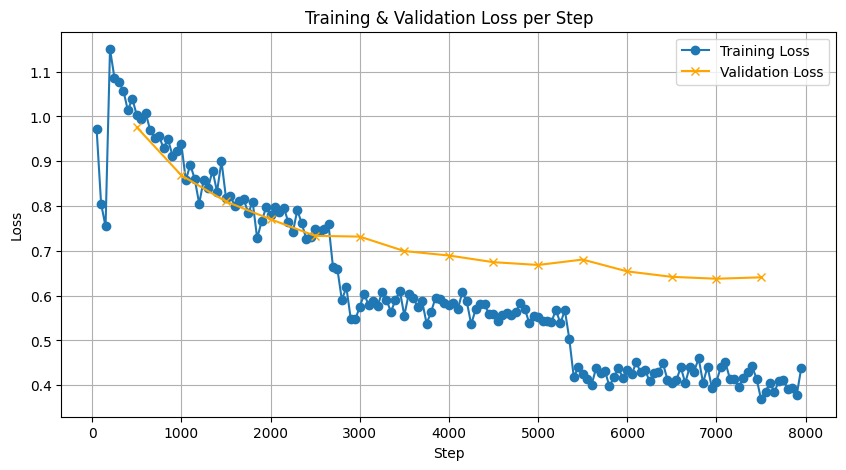

In [ ]:
import json
import matplotlib.pyplot as plt

state_path = "/content/drive/MyDrive/model_checkpoints/led-edgar-finGPTstyle-GENAI15/checkpoint-7995/trainer_state.json"

with open(state_path, "r") as f:
    state = json.load(f)

train_steps = []
train_loss = []
val_steps = []
val_loss = []

for log in state["log_history"]:
    if "loss" in log:
        train_steps.append(log["step"])
        train_loss.append(log["loss"])
    if "eval_loss" in log:
        val_steps.append(log["step"])
        val_loss.append(log["eval_loss"])

# Plot
plt.figure(figsize=(10,5))
plt.plot(train_steps, train_loss, label="Training Loss", marker="o")
plt.plot(val_steps, val_loss, label="Validation Loss", marker="x", color='orange')
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training & Validation Loss per Step")
plt.legend()
plt.grid(True)
plt.show()


Training loss is displayed after each model update (every 50 steps) and varies considerably as it is updated every batch, decreases dramatically. Validation loss is logged every 500 steps, making it more stable while decreasing steadily and indicating no symptoms of overfitting thus far.

### Training vs Validation loss( every 500 steps )

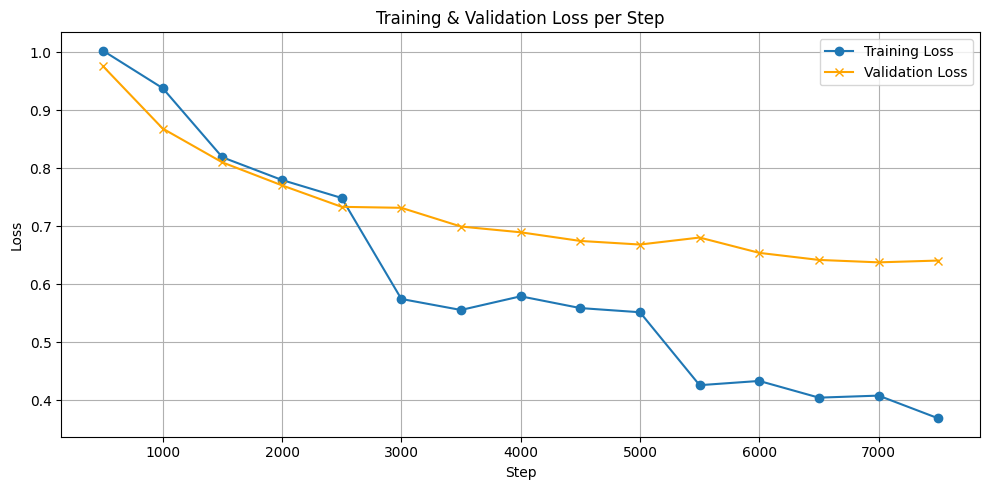

In [ ]:
import json
import matplotlib.pyplot as plt

# Ganti path ini ke lokasi checkpoint terakhirmu
state_path = "/content/drive/MyDrive/model_checkpoints/led-edgar-finGPTstyle-GENAI15/checkpoint-7995/trainer_state.json"

# Load training state
with open(state_path, "r") as f:
    state = json.load(f)

# Simpan step & loss
train_steps, train_loss = [], []
val_steps, val_loss = [], []

for log in state["log_history"]:
    if "loss" in log and log["step"] % 500 == 0:
        train_steps.append(log["step"])
        train_loss.append(log["loss"])
    if "eval_loss" in log:
        val_steps.append(log["step"])
        val_loss.append(log["eval_loss"])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_loss, label="Training Loss", marker="o")
plt.plot(val_steps, val_loss, label="Validation Loss", marker="x", color="orange")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training & Validation Loss per Step")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This graph is a simplified version of the previous one, displaying training and validation loss at each evaluation step (500 steps). As previously stated, this shows that the model is learning effectively, with no obvious evidence of overfitting.

### Save the pretrained model to Gdrive

In [ ]:
#Save the model to google drive
save_dir = "/content/drive/MyDrive/LED-FINAL-GENAI15" # Create the folder in drive first

trainer.model.save_pretrained(save_dir, safe_serialization=True)  # .safetensors
tok.save_pretrained(save_dir)

print("Model store in :", save_dir)

Model store in : /content/drive/MyDrive/LED-FINAL-GENAI15


LINK TO FINE TUNED MODEL =  https://drive.google.com/drive/folders/1SBteoUalgw4inIMfo24XyL-Q7tKrqsWA?usp=drive_link

LINK TO TRAINING CHECKPOINTS= https://drive.google.com/drive/folders/1H-7tkymraOSzzQ_oLlolvKPZ9jhyAV4K?usp=sharing

## Evaluation of Finetuning Model

### Test the model (test on the test data using fine tuned LED Model)

In [ ]:
# --- Imports ---
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from random import sample
from tqdm import tqdm
import torch
import evaluate

# --- Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
# --- Load  fine-tuned LED model ---
final_model_path = "/content/drive/MyDrive/LED-FINAL-GENAI15"
led_tok = AutoTokenizer.from_pretrained(final_model_path)
led_model = AutoModelForSeq2SeqLM.from_pretrained(final_model_path).to(device)

# --- Define summarization function ---
def led_finetuned_summarize(text, max_input=8000, max_target=256):  # L4 GPU support 8000
    tokens = led_tok(text, truncation=True, max_length=max_input, return_tensors="pt").to(device)
    ga = torch.zeros_like(tokens["input_ids"]).to(device)
    ga[:, 0] = 1
    summary_ids = led_model.generate(
        **tokens,
        global_attention_mask=ga,
        min_length=16,
        max_new_tokens=max_target,
        no_repeat_ngram_size=3,  # Prevent the repetition of n-grams of size 3 (e.g., repeating phrases or words in the summary).
        encoder_no_repeat_ngram_size=3,# Apply the same restriction on n-grams for the encoder, ensuring diversity in the generated text.
        repetition_penalty=2.5, # Apply a penalty to repetitive tokens in the generated summary to encourage diversity and avoid redundancy.
        num_beams=4,# Use beam search with 4 beams, improving the chances of finding the best possible summary by considering multiple options.
        early_stopping=True
    )
    return led_tok.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
# --- Generate summaries on 20 random test samples ---
indices = sample(range(len(test_de)), 20)
preds, refs = [], []

for i in tqdm(indices, desc="Summarizing"):
    inp = test_de.iloc[i]["input"]
    ref = test_de.iloc[i]["summary"]
    refs.append(ref)
    pred = led_finetuned_summarize(inp)
    preds.append(pred)


Summarizing: 100%|██████████| 20/20 [02:13<00:00,  6.66s/it]


In [ ]:
# --- Evaluate with ROUGE ---
rouge = evaluate.load("rouge")
scores = rouge.compute(predictions=preds, references=refs)
print("\n=== ROUGE Scores (LED Fine-tuned) ===")
for k, v in scores.items():
    print(f"{k}: {v:.4f}")


=== ROUGE Scores (LED Fine-tuned) ===
rouge1: 0.5121
rouge2: 0.2089
rougeL: 0.2987
rougeLsum: 0.4359


#### ROUGE Scores Comparison

#### BART-financial-summarization (1k-token slice)

| Metric    | Score   |
|-----------|---------|
| **ROUGE-1**   | 0.4574  |
| **ROUGE-2**   | 0.1976  |
| **ROUGE-L**   | 0.2728  |
| **ROUGE-Lsum**| 0.3876  |

#### **LED Fine-tuned**

| Metric    | Score   |
|-----------|---------|
| **ROUGE-1**   | 0.5121  |
| **ROUGE-2**   | 0.2089  |
| **ROUGE-L**   | 0.2987  |
| **ROUGE-Lsum**| 0.4359  |

#### LED-Book (8000-token summary)

| Metric    | Score   |
|-----------|---------|
| **ROUGE-1**   | 0.3066  |
| **ROUGE-2**   | 0.0470  |
| **ROUGE-L**   | 0.1391  |
| **ROUGE-Lsum**| 0.2128  |


Based on a comparison of 20 test samples, our fine-tuned model (`LED-FINAL-GENAI15`) outperformed both `thekritsadaK/bart-financial-summarization` and the base LED model(`pszemraj/led-large-book-summary`) in all ROUGE metrics: ROUGE-1 (individual word match), ROUGE-2 (phrase match), and ROUGE-L/Lsum (summary structure). This demonstrates that our model, which was fine-tuned on `pszemraj/led-large-book-summary` utilizing EDGAR financial data, can handle longer inputs more successfully and provide better summaries of financial documents.

### Try inference from one example in test data

We examine how well our fine-tuned model (`LED-FINAL-GENAI15`) summarizes a real-world example from the a test set versus the initial pretrained model (`pszemraj/led-large-book-summary`), with and without a global attention mask.

#### Without global attention mask (using pipeline HuggingFace API)

In [ ]:
test_de

,input,summary,model,doc_id
0,"ITEM 8: FINANCIAL STATEMENTS December 31, 2016...","This financial statement shows a loss of $229,...",ChatGPT,2cf50ba8b8ebeeefd9fae6019ab5464c
1,Management’s Annual Report on Internal Control...,The financial statement provided includes info...,ChatGPT,26bd048b471e3557141e0d221426f720
2,ITEM 8 REPORT OF MANAGEMENT RESPONSIBILITIES T...,The financial statement provided includes deta...,ChatGPT,c77865b3ec688b230dfbd8ed9db23897
3,". WIGI4YOU, INC. June 30, 2016 REPORT OF REGIS...",The financial statement provided indicates tha...,ChatGPT,ee9b16d8c3824b9fe86bc7adb8684b93
4,INDEX TO CONSOLIDATED FINANCIAL STATEMENTS To ...,The financial statement provided includes deta...,ChatGPT,f2fa2b8acf9a0f8e49f5d25b4c8d0ce9
...,...,...,...,...
662,Financial Statements KEMIAO GARMENT HOLDING GR...,The financial statement provided includes info...,ChatGPT,dbcb387d1012dde0c4beae46c9f6fe1f
663,See See See See See See GUARANTY FEDERAL BANCS...,The financial statement provided includes deta...,ChatGPT,34f449268ba3433d1ab0052a1ff7db78
664,ITEM 8 - Index to Consolidated Financial State...,The financial statements of Bioanalytical Syst...,ChatGPT,133bf02acf40fde7ec3335b0e1cdc02a
665,". CarGurus, Inc. Index to Consolidated Financi...",Revenue: The total revenue as of December 31 i...,ChatGPT,28af70907fd6c8d0cb957b87dc26604f


In [ ]:
print(test_de.iloc[3]) # Print the entire row
# Or, to print specific columns:
print(test_de.iloc[3]['input'])  # Print the 'input' column of the second row
print(test_de.iloc[3]['summary']) # Print the 'summary' column of the second row
print(test_de.iloc[3]['model'])   # Print the 'model' column of the second row
print(test_de.iloc[3]['doc_id'])  # Print the 'doc_id' column of the second row

input      . WIGI4YOU, INC. June 30, 2016 REPORT OF REGIS...
summary    The financial statement provided indicates tha...
model                                                ChatGPT
doc_id                      ee9b16d8c3824b9fe86bc7adb8684b93
Name: 3, dtype: object
. WIGI4YOU, INC. June 30, 2016 REPORT OF REGISTERED INDEPENDENT AUDITORS To the Board of Directors and Stockholders of Wigi4you, Inc.: We have audited the accompanying balance sheets of Wigi4you, Inc. as of June 30, 2016 and 2015, and the related statements of operations, stockholders’ equity, and cash flows for the years ended June 30, 2016 and 2015. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audit. We conducted our audit in accordance with standards of the Public Company Accounting Oversight Board (United States of America). Those standards require that we plan and perform the audit to obtain reasonab

##### Using Pretrained finetune model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import torch
#Fine tune model
model_path = "/content/drive/MyDrive/LED-FINAL-GENAI15"
device = 0 if torch.cuda.is_available() else -1

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)


In [ ]:
!ls /content/drive/MyDrive/LED-FINAL-GENAI15


config.json		model.safetensors	 tokenizer.json
generation_config.json	special_tokens_map.json  vocab.json
merges.txt		tokenizer_config.json


In [ ]:
summarizer = pipeline(
    "summarization",
    model=model,
    tokenizer=tokenizer,
    device=device
)

Device set to use cuda:0


In [ ]:
wall_of_text = """ WIGI4YOU, INC. June 30, 2016 REPORT OF REGISTERED INDEPENDENT AUDITORS To the Board of Directors and Stockholders of Wigi4you, Inc.: We have audited the accompanying balance sheets of Wigi4you, Inc. as of June 30, 2016 and 2015, and the related statements of operations, stockholders’ equity, and cash flows for the years ended June 30, 2016 and 2015. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audit. We conducted our audit in accordance with standards of the Public Company Accounting Oversight Board (United States of America). Those standards require that we plan and perform the audit to obtain reasonable assurance about whether the financial statements are free of material misstatement. The Company is not required to have, nor were we engaged to perform, an audit of its internal control over financial reporting. Our audit included consideration of internal control over financial reporting as a basis for designing audit procedures that are appropriate in the circumstances, but not for the purpose of expressing an opinion on the effectiveness of the Company’s internal control over financial reporting. Accordingly, we express no such opinion. An audit includes examining, on a test basis, evidence supporting the amounts and disclosures in the financial statements. An audit also includes assessing the accounting principles used and significant estimates made by management, as well as evaluating the overall financial statement presentation. We believe that our audit provides a reasonable basis for our opinion. In our opinion, the financial statements referred to above present fairly, in all material respects, the financial position of Wigi4you, Inc. as of June 30, 2016 and 2015, and the results of its operations and its cash flows for the years ended then ended, in conformity with accounting principles generally accepted in the United States of America. The accompanying financial statements have been prepared assuming that the Company will continue as a going concern. As discussed in Note B to the financial statements, the Company has not established any source of revenue to cover its operating costs. As such, it has incurred an operating loss since inception. Further, as of as June 30, 2016, the cash resources of the Company were insufficient to meet its planned business objectives. These and other factors raise substantial doubt about the Company’s ability to continue as a going concern. Management’s plan regarding these matters is also described in Note B to the financial statements. The financial statements do not include any adjustments that might result from the outcome of this uncertainty. Respectfully submitted, Weinberg & Baer LLC Baltimore, Maryland September 27, 2016 WIGI4YOU, INC. NOTES TO FINANCIAL STATEMENTS June 30, 2016 NOTE A - SUMMARY OF SIGNIFICANT ACCOUNTING POLICIES A summary of significant accounting policies of Wigi4you, Inc. (the Company) is presented to assist in understanding the Company’s financial statements. The accounting policies presented in these footnotes conform to accounting principles generally accepted in the United States of America and have been consistently applied in the preparation of the accompanying financial statements. These financial statements and notes are representations of the Company’s management who are responsible for their integrity and objectivity. The Company has not realized revenues from its planned principal business purpose. Organization, Nature of Business and Trade Name Wigi4you, Inc. (the Company) was incorporated in the State of Nevada on March 19, 2014. Wigi4you, Inc. intends to provide a website and mobile app to assist event planners in locating performers, bands and speakers, booking locations and planning events in areas around the United States and Canada. The Company’s activities are subject to significant risks and uncertainties including failing to secure additional funding to operationalize the Company’s website and apps before another company develops similar websites or apps. Property and Equipment Property and equipment are carried at cost. Expenditures for maintenance and repairs are charged against operations. Renewals and betterments that materially extend the life of the assets are capitalized. When assets are retired or otherwise disposed of, the cost and related accumulated depreciation are removed from the accounts, and any resulting gain or loss is reflected in income for the period. Depreciation is computed for financial statement purposes on a straight-line basis over estimated useful lives of the related assets. The estimated useful lives of depreciable assets are: For federal income tax purposes, depreciation is computed under the modified accelerated cost recovery system. For financial statements purposes, depreciation is computed under the straight-line method. The Company has been in the developmental stage since inception and has no operations to date. The Company currently does not have any property and equipment. The above accounting policies will be adopted upon the Company maintains property and equipment. Cash and Cash Equivalents For purposes of the statement of cash flows, the Company considers all short-term debt securities purchased with maturity of three months or less to be cash equivalents. Recent Accounting Pronouncements On June 10, 2014, the Financial Accounting Standards Board ("FASB") issued update ASU 2014-10, Development Stage Entities (Topic 915). Amongst other things, the amendments in this update removed the definition of development stage entity from Topic 915, thereby removing the distinction between development stage entities and other reporting entities from US GAAP. In addition, the amendments eliminate the requirements for development stage entities to (1) present inception-to-date information on the statements of income, cash flows and shareholders equity, (2) label the financial statements as those of a development stage entity; (3) disclose a description of the development stage activities in which the entity is engaged and (4) disclose in the first year in which the entity is no longer a development stage entity that in prior years it had been in the development stage. The amendments are effective for annual reporting periods beginning after December 31, 2014 and interim reporting periods beginning after March 15, 2015, however entities are permitted to early adopt for any annual or interim reporting period for which the financial statements have yet to be issued. The Company has elected to early adopt these amendments and accordingly have not labeled the financial statements as those of a development stage entity and have not presented inception-to-date information on the respective financial statements. Revenue recognition The Company’s revenue recognition policies are in compliance with FASB ASC 605-35 “Revenue Recognition”. Revenue is recognized when a formal arrangement exists, the price is fixed or determinable, all obligations have been performed pursuant to the terms of the formal arrangement and collectability is reasonably assured. The Company recognizes revenues on sales of its services, based on the terms of the customer agreement. The customer agreement takes the form of either a contract or a customer purchase order and each provides information with respect to the service being sold and the sales price. If the customer agreement does not have specific delivery or customer acceptance terms, revenue is recognized at the time the service is provided to the customer. Fair Value of Financial Instruments The Company applies fair value accounting for all financial assets and liabilities and non-financial assets and liabilities that are recognized or disclosed at fair value in the financial statements on a recurring basis. The Company defines fair value as the price that would be received from selling an asset or paid to transfer a liability in an orderly transaction between market participants at the measurement date. When determining the fair value measurements for assets and liabilities, which are required to be recorded at fair value, the Company considers the principal or most advantageous market in which the Company would transact and the market-based risk measurements or assumptions that market participants would use in pricing the asset or liability, such as risks inherent in valuation techniques, transfer restrictions and credit risk. Fair value is estimated by applying the following hierarchy, which prioritizes the inputs used to measure fair value into three levels and bases the categorization within the hierarchy upon the lowest level of input that is available and significant to the fair value measurement: Level 1 - Quoted prices in active markets for identical assets or liabilities. Level 2 - Observable inputs other than quoted prices in active markets for identical assets and liabilities, quoted prices for identical or similar assets or liabilities in inactive markets, or other inputs that are observable or can be corroborated by observable market data for substantially the full term of the assets or liabilities. Level 3 - Inputs that are generally unobservable and typically reflect management’s estimate of assumptions that market participants would use in pricing the asset or liability. In accordance with the fair value accounting requirements, companies may choose to measure eligible financial instruments and certain other items at fair value. The Company has not elected the fair value option for any eligible financial instruments. As of June 30, 2016 and June 30, 2015, the carrying value of loans that are required to be measured at fair value, approximated fair value due to the short-term nature and maturity of these instruments. Advertising Advertising expenses are recorded as general and administrative expenses when they are incurred. Use of Estimates The preparation of financial statements in accounting principles generally accepted in the United States of America requires management to make estimates and assumptions that affect the reported amounts of assets and liabilities and disclosure of contingent assets and liabilities at the date of the financial statements and the reported amounts of revenues and expenses during the reporting period. A change in managements’ estimates or assumptions could have a material impact on Wigi4You, Inc.’s financial condition and results of operations during the period in which such changes occurred. Actual results could differ from those estimates. Wigi4You, Inc.’s financial statements reflect all adjustments that management believes are necessary for the fair presentation of their financial condition and results of operations for the periods presented. Capital Stock The Company has authorized Seventy Five Million (75,000,000) shares of common stock with a par value of $0.001. Five Million Two Hundred and Fifty Thousand (5,250,000) shares of common stock were issued and outstanding as of June 30, 2016 and June 30, 2015, respectively. Income Taxes The Company recognizes the tax effects of transactions in the year in which such transactions enter into the determination of net income, regardless of when reported for tax purposes. NOTE B - GOING CONCERN The Company's financial statements are prepared using accounting principles generally accepted in the United States of America applicable to a going concern, which contemplates the realization of assets and liquidation of liabilities in the normal course of business. However, the Company does not have an established source of revenues sufficient to cover its operating costs and to allow it to continue as a going concern. Under the going concern assumption, an entity is ordinarily viewed as continuing in business for the foreseeable future with neither the intention nor the necessity of liquidation, ceasing trading, or seeking protection from creditors pursuant to laws or regulations. Accordingly, assets and liabilities are recorded on the basis that the entity will be able to realize its assets and discharge its liabilities in the normal course of business. The ability of the Company to continue as a going concern is dependent upon its ability to successfully accomplish the plan described in the Business paragraph and eventually attain profitable operations. The accompanying financial statements do not include any adjustments that may be necessary if the Company is unable to continue as a going concern. During the next year, the Company’s foreseeable cash requirements will relate to continual development of the operations of its business, maintaining its good standing and making the requisite filings with the Securities and Exchange Commission, and the payment of expenses associated with app development. The Company may experience a cash shortfall and be required to raise additional capital. Historically, it has mostly relied upon internally generated funds and funds from the sale of shares of stock to finance its operations and growth. Management may raise additional capital through future public or private offerings of the Company’s stock or through loans from private investors, although there can be no assurance that it will be able to obtain such financing. The Company’s failure to do so could have a material and adverse effect upon it and its shareholders. In the past year, the Company funded operations by using cash proceeds received through the issuance of common stock. For the coming year, the Company plans to continue to fund the Company through debt and securities sales and issuances until the company generates enough revenues through the operations as stated above. NOTE C - COMMON STOCK On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. As of June 30, 2016 the Company has received $41,000 from investors for 1,640,000 shares of common stock to be issued. The shares were subscribed as per a Registration Statement filed with the SEC to register and sell 2,000,000 shares of newly issued common stock at an offering price of $0.025 per share. NOTE D - RELATED PARTY TRANSACTIONS On July 22, 2014, a Director of the company paid $555 to Thomas Puzzo towards his accounts payable due. The loan is unsecured, non-interest bearing, and due on demand. On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. NOTE E - INCOME TAXES For the year ended June 30, 2016, the Company has incurred net losses and therefore, has no tax liability. The net deferred tax asset generated by the loss carry-forward has been fully reserved. The cumulative net operating loss carry-forward is approximately $17,566 at June 30, 2016, and will expire beginning in the year 2034. The provision for income taxes differs from the amounts which would be provided by applying the statutory federal income tax rate of 34% to the net loss before provision for income taxes as follows: Net deferred tax assets consist of the following components as of June 30, 2016 and June 30, 2015: Due to the change in ownership provisions of the Tax Reform Act of 1986, net operating loss carry forwards of approximately $17,566 for federal income tax reporting purposes could be subject to annual limitations. Should a change in ownership occur, net operating loss carry forwards may be limited as to use in future years. The Company has no uncertain tax positions that require the Company to record a liability. The Company had no accrued penalties and interest related to taxes as of June 30, 2016. NOTE F - SUBSEQUENT EVENT During August 2016, Company received $9,000 from investors for 360,000 shares of common stock to be issued. On September 21, 2016, Company issued 2,000,000 shares to various investors at a price of $0.025 per share against the share application money received."""

result = summarizer(
    wall_of_text,
    min_length=16,
    max_length=256,
    no_repeat_ngram_size=3,
    encoder_no_repeat_ngram_size=3,
    repetition_penalty=2.5,
    num_beams=4,
    early_stopping=True,
)

In [ ]:
result=result[0]['summary_text'].replace("\n", " ")
result

'The financial statement provided indicates that the company has been experiencing a loss since its inception. This means that the expenses have exceeded its revenues over the years, resulting in a negative net income. The company has incurred operating costs that have contributed to its overall financial performance. Additionally, the statement mentions that it has been incurring losses since its establishment on June 30.  Expenses mentioned in the statement refer to the costs incurred by the company in running its operations. These expenses include operating expenses such as salaries, rent, utilities, and other overhead costs. It is important to note that these expenses are deducted from the revenue to calculate the company\'s net income or loss for the specified period to determine the overall profitability of the business.   The statement also mentions liabilities related to debt securities bought with borrowed funds. Liabilities may include accounts payable, loans, accrued expense

##### Using Pretrained model Largebook

In [ ]:
hf_name = 'pszemraj/led-large-book-summary'

summarizer_1 = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
result_ = summarizer_1(
    wall_of_text,
    min_length=16,
    max_length=256,
    no_repeat_ngram_size=3,
    encoder_no_repeat_ngram_size=3,
    repetition_penalty=2.5,
    num_beams=4,
    early_stopping=True,
)

In [ ]:
result_

[{'summary_text': 'In this report, the directors and stockholders are told of the audit that has taken place on the balance sheet. The auditors have examined the accounts and found no material errors or omissions. They believe that the company will continue to operate as going concern for the next two fiscal years. Although they do not yet have a sufficient cash flow to meet their business objectives, there is "substantial doubt" about the company\'s ability to go on as going-forward. The company has not been profitable since its inception and it has suffered an annual operating loss every year since then. The cash resources are insufficient to fulfill its business goals. There are numerous other factors that contribute to the substantial doubt over the Company\'s solvency. In order to make money, the company earns revenue through advertising, subscriptions, and sales of services. It does not generate enough profit to pay its operating expenses. The revenues from these sources are not 

##### ROUGE SCORE COMPARISON

In [ ]:
from evaluate import load

rouge = load("rouge")

original_summary = test_de.iloc[3]['summary']
pretrained_summary = result
largebook_summary = result_[0]['summary_text']

# Calculate ROUGE scores for the pretrained model
scores_pretrained = rouge.compute(predictions=[pretrained_summary], references=[original_summary])
print("\n=== ROUGE Scores (Pretrained Model) ===")
for k, v in scores_pretrained.items():
    print(f"{k}: {v:.4f}")

# Calculate ROUGE scores for the largebook model
scores_largebook = rouge.compute(predictions=[largebook_summary], references=[original_summary])
print("\n=== ROUGE Scores (Largebook Model) ===")
for k, v in scores_largebook.items():
    print(f"{k}: {v:.4f}")



=== ROUGE Scores (Pretrained Model) ===
rouge1: 0.4304
rouge2: 0.1397
rougeL: 0.2174
rougeLsum: 0.3000

=== ROUGE Scores (Largebook Model) ===
rouge1: 0.3362
rouge2: 0.0649
rougeL: 0.1422
rougeLsum: 0.2241


The pipeline inference test in a specific example text, using index 3 test data, showed that the pretrained fine-tuned model had a better overall ROUGE score than the baseline model.

#### With global attention mask

In [ ]:
test_de

,input,summary,model,doc_id
0,"ITEM 8: FINANCIAL STATEMENTS December 31, 2016...","This financial statement shows a loss of $229,...",ChatGPT,2cf50ba8b8ebeeefd9fae6019ab5464c
1,Management’s Annual Report on Internal Control...,The financial statement provided includes info...,ChatGPT,26bd048b471e3557141e0d221426f720
2,ITEM 8 REPORT OF MANAGEMENT RESPONSIBILITIES T...,The financial statement provided includes deta...,ChatGPT,c77865b3ec688b230dfbd8ed9db23897
3,". WIGI4YOU, INC. June 30, 2016 REPORT OF REGIS...",The financial statement provided indicates tha...,ChatGPT,ee9b16d8c3824b9fe86bc7adb8684b93
4,INDEX TO CONSOLIDATED FINANCIAL STATEMENTS To ...,The financial statement provided includes deta...,ChatGPT,f2fa2b8acf9a0f8e49f5d25b4c8d0ce9
...,...,...,...,...
662,Financial Statements KEMIAO GARMENT HOLDING GR...,The financial statement provided includes info...,ChatGPT,dbcb387d1012dde0c4beae46c9f6fe1f
663,See See See See See See GUARANTY FEDERAL BANCS...,The financial statement provided includes deta...,ChatGPT,34f449268ba3433d1ab0052a1ff7db78
664,ITEM 8 - Index to Consolidated Financial State...,The financial statements of Bioanalytical Syst...,ChatGPT,133bf02acf40fde7ec3335b0e1cdc02a
665,". CarGurus, Inc. Index to Consolidated Financi...",Revenue: The total revenue as of December 31 i...,ChatGPT,28af70907fd6c8d0cb957b87dc26604f


In [ ]:
print(test_de.iloc[3]) # Print the entire row
# Or, to print specific columns:
print(test_de.iloc[3]['input'])  # Print the 'input' column of the second row
print(test_de.iloc[3]['summary']) # Print the 'summary' column of the second row
print(test_de.iloc[3]['model'])   # Print the 'model' column of the second row
print(test_de.iloc[3]['doc_id'])  # Print the 'doc_id' column of the second row

input      . WIGI4YOU, INC. June 30, 2016 REPORT OF REGIS...
summary    The financial statement provided indicates tha...
model                                                ChatGPT
doc_id                      ee9b16d8c3824b9fe86bc7adb8684b93
Name: 3, dtype: object
. WIGI4YOU, INC. June 30, 2016 REPORT OF REGISTERED INDEPENDENT AUDITORS To the Board of Directors and Stockholders of Wigi4you, Inc.: We have audited the accompanying balance sheets of Wigi4you, Inc. as of June 30, 2016 and 2015, and the related statements of operations, stockholders’ equity, and cash flows for the years ended June 30, 2016 and 2015. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audit. We conducted our audit in accordance with standards of the Public Company Accounting Oversight Board (United States of America). Those standards require that we plan and perform the audit to obtain reasonab

##### Using Pretrained finetune model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import torch
#Fine tune model
model_path = "/content/drive/MyDrive/LED-FINAL-GENAI15"
device = 0 if torch.cuda.is_available() else -1

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)


In [ ]:
!ls /content/drive/MyDrive/LED-FINAL-GENAI15


config.json		model.safetensors	 tokenizer.json
generation_config.json	special_tokens_map.json  vocab.json
merges.txt		tokenizer_config.json


In [ ]:
summarizer = pipeline(
    "summarization",
    model=model,
    tokenizer=tokenizer,
    device=device
)

Device set to use cuda:0


In [ ]:
wall_of_text = """ WIGI4YOU, INC. June 30, 2016 REPORT OF REGISTERED INDEPENDENT AUDITORS To the Board of Directors and Stockholders of Wigi4you, Inc.: We have audited the accompanying balance sheets of Wigi4you, Inc. as of June 30, 2016 and 2015, and the related statements of operations, stockholders’ equity, and cash flows for the years ended June 30, 2016 and 2015. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audit. We conducted our audit in accordance with standards of the Public Company Accounting Oversight Board (United States of America). Those standards require that we plan and perform the audit to obtain reasonable assurance about whether the financial statements are free of material misstatement. The Company is not required to have, nor were we engaged to perform, an audit of its internal control over financial reporting. Our audit included consideration of internal control over financial reporting as a basis for designing audit procedures that are appropriate in the circumstances, but not for the purpose of expressing an opinion on the effectiveness of the Company’s internal control over financial reporting. Accordingly, we express no such opinion. An audit includes examining, on a test basis, evidence supporting the amounts and disclosures in the financial statements. An audit also includes assessing the accounting principles used and significant estimates made by management, as well as evaluating the overall financial statement presentation. We believe that our audit provides a reasonable basis for our opinion. In our opinion, the financial statements referred to above present fairly, in all material respects, the financial position of Wigi4you, Inc. as of June 30, 2016 and 2015, and the results of its operations and its cash flows for the years ended then ended, in conformity with accounting principles generally accepted in the United States of America. The accompanying financial statements have been prepared assuming that the Company will continue as a going concern. As discussed in Note B to the financial statements, the Company has not established any source of revenue to cover its operating costs. As such, it has incurred an operating loss since inception. Further, as of as June 30, 2016, the cash resources of the Company were insufficient to meet its planned business objectives. These and other factors raise substantial doubt about the Company’s ability to continue as a going concern. Management’s plan regarding these matters is also described in Note B to the financial statements. The financial statements do not include any adjustments that might result from the outcome of this uncertainty. Respectfully submitted, Weinberg & Baer LLC Baltimore, Maryland September 27, 2016 WIGI4YOU, INC. NOTES TO FINANCIAL STATEMENTS June 30, 2016 NOTE A - SUMMARY OF SIGNIFICANT ACCOUNTING POLICIES A summary of significant accounting policies of Wigi4you, Inc. (the Company) is presented to assist in understanding the Company’s financial statements. The accounting policies presented in these footnotes conform to accounting principles generally accepted in the United States of America and have been consistently applied in the preparation of the accompanying financial statements. These financial statements and notes are representations of the Company’s management who are responsible for their integrity and objectivity. The Company has not realized revenues from its planned principal business purpose. Organization, Nature of Business and Trade Name Wigi4you, Inc. (the Company) was incorporated in the State of Nevada on March 19, 2014. Wigi4you, Inc. intends to provide a website and mobile app to assist event planners in locating performers, bands and speakers, booking locations and planning events in areas around the United States and Canada. The Company’s activities are subject to significant risks and uncertainties including failing to secure additional funding to operationalize the Company’s website and apps before another company develops similar websites or apps. Property and Equipment Property and equipment are carried at cost. Expenditures for maintenance and repairs are charged against operations. Renewals and betterments that materially extend the life of the assets are capitalized. When assets are retired or otherwise disposed of, the cost and related accumulated depreciation are removed from the accounts, and any resulting gain or loss is reflected in income for the period. Depreciation is computed for financial statement purposes on a straight-line basis over estimated useful lives of the related assets. The estimated useful lives of depreciable assets are: For federal income tax purposes, depreciation is computed under the modified accelerated cost recovery system. For financial statements purposes, depreciation is computed under the straight-line method. The Company has been in the developmental stage since inception and has no operations to date. The Company currently does not have any property and equipment. The above accounting policies will be adopted upon the Company maintains property and equipment. Cash and Cash Equivalents For purposes of the statement of cash flows, the Company considers all short-term debt securities purchased with maturity of three months or less to be cash equivalents. Recent Accounting Pronouncements On June 10, 2014, the Financial Accounting Standards Board ("FASB") issued update ASU 2014-10, Development Stage Entities (Topic 915). Amongst other things, the amendments in this update removed the definition of development stage entity from Topic 915, thereby removing the distinction between development stage entities and other reporting entities from US GAAP. In addition, the amendments eliminate the requirements for development stage entities to (1) present inception-to-date information on the statements of income, cash flows and shareholders equity, (2) label the financial statements as those of a development stage entity; (3) disclose a description of the development stage activities in which the entity is engaged and (4) disclose in the first year in which the entity is no longer a development stage entity that in prior years it had been in the development stage. The amendments are effective for annual reporting periods beginning after December 31, 2014 and interim reporting periods beginning after March 15, 2015, however entities are permitted to early adopt for any annual or interim reporting period for which the financial statements have yet to be issued. The Company has elected to early adopt these amendments and accordingly have not labeled the financial statements as those of a development stage entity and have not presented inception-to-date information on the respective financial statements. Revenue recognition The Company’s revenue recognition policies are in compliance with FASB ASC 605-35 “Revenue Recognition”. Revenue is recognized when a formal arrangement exists, the price is fixed or determinable, all obligations have been performed pursuant to the terms of the formal arrangement and collectability is reasonably assured. The Company recognizes revenues on sales of its services, based on the terms of the customer agreement. The customer agreement takes the form of either a contract or a customer purchase order and each provides information with respect to the service being sold and the sales price. If the customer agreement does not have specific delivery or customer acceptance terms, revenue is recognized at the time the service is provided to the customer. Fair Value of Financial Instruments The Company applies fair value accounting for all financial assets and liabilities and non-financial assets and liabilities that are recognized or disclosed at fair value in the financial statements on a recurring basis. The Company defines fair value as the price that would be received from selling an asset or paid to transfer a liability in an orderly transaction between market participants at the measurement date. When determining the fair value measurements for assets and liabilities, which are required to be recorded at fair value, the Company considers the principal or most advantageous market in which the Company would transact and the market-based risk measurements or assumptions that market participants would use in pricing the asset or liability, such as risks inherent in valuation techniques, transfer restrictions and credit risk. Fair value is estimated by applying the following hierarchy, which prioritizes the inputs used to measure fair value into three levels and bases the categorization within the hierarchy upon the lowest level of input that is available and significant to the fair value measurement: Level 1 - Quoted prices in active markets for identical assets or liabilities. Level 2 - Observable inputs other than quoted prices in active markets for identical assets and liabilities, quoted prices for identical or similar assets or liabilities in inactive markets, or other inputs that are observable or can be corroborated by observable market data for substantially the full term of the assets or liabilities. Level 3 - Inputs that are generally unobservable and typically reflect management’s estimate of assumptions that market participants would use in pricing the asset or liability. In accordance with the fair value accounting requirements, companies may choose to measure eligible financial instruments and certain other items at fair value. The Company has not elected the fair value option for any eligible financial instruments. As of June 30, 2016 and June 30, 2015, the carrying value of loans that are required to be measured at fair value, approximated fair value due to the short-term nature and maturity of these instruments. Advertising Advertising expenses are recorded as general and administrative expenses when they are incurred. Use of Estimates The preparation of financial statements in accounting principles generally accepted in the United States of America requires management to make estimates and assumptions that affect the reported amounts of assets and liabilities and disclosure of contingent assets and liabilities at the date of the financial statements and the reported amounts of revenues and expenses during the reporting period. A change in managements’ estimates or assumptions could have a material impact on Wigi4You, Inc.’s financial condition and results of operations during the period in which such changes occurred. Actual results could differ from those estimates. Wigi4You, Inc.’s financial statements reflect all adjustments that management believes are necessary for the fair presentation of their financial condition and results of operations for the periods presented. Capital Stock The Company has authorized Seventy Five Million (75,000,000) shares of common stock with a par value of $0.001. Five Million Two Hundred and Fifty Thousand (5,250,000) shares of common stock were issued and outstanding as of June 30, 2016 and June 30, 2015, respectively. Income Taxes The Company recognizes the tax effects of transactions in the year in which such transactions enter into the determination of net income, regardless of when reported for tax purposes. NOTE B - GOING CONCERN The Company's financial statements are prepared using accounting principles generally accepted in the United States of America applicable to a going concern, which contemplates the realization of assets and liquidation of liabilities in the normal course of business. However, the Company does not have an established source of revenues sufficient to cover its operating costs and to allow it to continue as a going concern. Under the going concern assumption, an entity is ordinarily viewed as continuing in business for the foreseeable future with neither the intention nor the necessity of liquidation, ceasing trading, or seeking protection from creditors pursuant to laws or regulations. Accordingly, assets and liabilities are recorded on the basis that the entity will be able to realize its assets and discharge its liabilities in the normal course of business. The ability of the Company to continue as a going concern is dependent upon its ability to successfully accomplish the plan described in the Business paragraph and eventually attain profitable operations. The accompanying financial statements do not include any adjustments that may be necessary if the Company is unable to continue as a going concern. During the next year, the Company’s foreseeable cash requirements will relate to continual development of the operations of its business, maintaining its good standing and making the requisite filings with the Securities and Exchange Commission, and the payment of expenses associated with app development. The Company may experience a cash shortfall and be required to raise additional capital. Historically, it has mostly relied upon internally generated funds and funds from the sale of shares of stock to finance its operations and growth. Management may raise additional capital through future public or private offerings of the Company’s stock or through loans from private investors, although there can be no assurance that it will be able to obtain such financing. The Company’s failure to do so could have a material and adverse effect upon it and its shareholders. In the past year, the Company funded operations by using cash proceeds received through the issuance of common stock. For the coming year, the Company plans to continue to fund the Company through debt and securities sales and issuances until the company generates enough revenues through the operations as stated above. NOTE C - COMMON STOCK On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. As of June 30, 2016 the Company has received $41,000 from investors for 1,640,000 shares of common stock to be issued. The shares were subscribed as per a Registration Statement filed with the SEC to register and sell 2,000,000 shares of newly issued common stock at an offering price of $0.025 per share. NOTE D - RELATED PARTY TRANSACTIONS On July 22, 2014, a Director of the company paid $555 to Thomas Puzzo towards his accounts payable due. The loan is unsecured, non-interest bearing, and due on demand. On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. NOTE E - INCOME TAXES For the year ended June 30, 2016, the Company has incurred net losses and therefore, has no tax liability. The net deferred tax asset generated by the loss carry-forward has been fully reserved. The cumulative net operating loss carry-forward is approximately $17,566 at June 30, 2016, and will expire beginning in the year 2034. The provision for income taxes differs from the amounts which would be provided by applying the statutory federal income tax rate of 34% to the net loss before provision for income taxes as follows: Net deferred tax assets consist of the following components as of June 30, 2016 and June 30, 2015: Due to the change in ownership provisions of the Tax Reform Act of 1986, net operating loss carry forwards of approximately $17,566 for federal income tax reporting purposes could be subject to annual limitations. Should a change in ownership occur, net operating loss carry forwards may be limited as to use in future years. The Company has no uncertain tax positions that require the Company to record a liability. The Company had no accrued penalties and interest related to taxes as of June 30, 2016. NOTE F - SUBSEQUENT EVENT During August 2016, Company received $9,000 from investors for 360,000 shares of common stock to be issued. On September 21, 2016, Company issued 2,000,000 shares to various investors at a price of $0.025 per share against the share application money received."""


# Input tokenization
inputs = tokenizer(
    wall_of_text,
    return_tensors="pt",
    truncation=True,
    max_length=8000
)

# Mglobal attention mask
global_attention_mask = torch.zeros(inputs["input_ids"].shape, dtype=torch.long)

# Set first and last token to get the global attention
global_attention_mask[:, 0] = 1
global_attention_mask[:, -1] = 1

# Generate summary
summary_ids = model.generate(
    inputs["input_ids"].to(device),
    attention_mask=inputs["attention_mask"].to(device),
    global_attention_mask=global_attention_mask.to(device),
    max_length=256,
    min_length=16,
    num_beams=4,
    repetition_penalty=2.5,
    no_repeat_ngram_size=3,
    early_stopping=True
)

# Decode summarization result
result_globalmask_pretrained =  tokenizer.decode(summary_ids[0], skip_special_tokens=True)
# Remove newline characters
result_globalmask_pretrained = result_globalmask_pretrained.replace("\n", " ")
result_globalmask_pretrained


"The financial statement provided includes information on the company's profit/loss, expenses, and liabilities.   1. Profit/Loss: The company has incurred a loss since its inception. As of June 30, the statement indicates that the company has not generated any revenue to cover its operating costs. This has resulted in an operating loss for the period under review.  2. Expenses: The statement mentions liabilities incurred in the normal course of business. It also highlights that the entity does not have an established source of revenues sufficient to cover operational costs and sustain its operations as a going concern. The company's ability to continue operating is dependent on its ability to successfully execute its plan and attain profitability. The financial statements do not include adjustments that may be necessary if the company is unable to continue as a Going Concern. The management's plan for the next year involves ongoing development of the business, maintaining good standing

##### Using Pretrained model Largebook

In [ ]:
hf_name = 'pszemraj/led-large-book-summary'

summarizer_1 = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Generate summary
model_1 = AutoModelForSeq2SeqLM.from_pretrained(hf_name).to(device)  # Move the model to the same device as input

summary_ids_1 = model_1.generate(
    inputs["input_ids"].to(device),  # Move input to the same device
    attention_mask=inputs["attention_mask"].to(device),  # Move attention mask to the same device
    global_attention_mask=global_attention_mask.to(device),  # Move global attention mask to the same device
    max_length=256,
    min_length=16,
    num_beams=4,
    repetition_penalty=2.5,
    no_repeat_ngram_size=3,
    early_stopping=True
)

# Decode the summary result
result_globalmask_pretrained_base = tokenizer.decode(summary_ids_1[0], skip_special_tokens=True)
result_globalmask_pretrained_base


'Wigi4you, Inc. discloses financial statements and notes to the Board of directors and stockholders as of June 30, 2016 and 2015. The Company has been incorporated in the State of Nevada on March 19, 2014 and intends to provide a website and mobile app to assist event planners in locating performers, bands and speakers. It has incurred an operating loss since inception. Cash requirements will relate to continual development of the business, maintaining its good standing and making the requisite filings with the Securities and Exchange Commission. In order to fund operations, the Company has mostly relied upon internally generated funds and funds from the sale of shares of stock. Fair Value accounting is used to calculate the fair value of all financial assets and liabilities. When assets are retired or otherwise disposed of, the cost and related accumulated depreciation are removed from the accounts, and any resulting gain is reflected in income tax. Depreciation is computed on a strai

##### ROUGE SCORE COMPARISON

In [ ]:
from evaluate import load

rouge = load("rouge")

original_summary = test_de.iloc[3]['summary']
pretrained_summary = result_globalmask_pretrained  # Assign the string directly
largebook_summary = result_globalmask_pretrained_base  # Assign the string directly

# Calculate ROUGE scores for the pretrained model
scores_pretrained = rouge.compute(predictions=[pretrained_summary], references=[original_summary])
print("\n=== ROUGE Scores fine tuning LED-FINAL-GENAI15 with global attention mask ===")
for k, v in scores_pretrained.items():
    print(f"{k}: {v:.4f}")

# Calculate ROUGE scores for the largebook model
scores_largebook = rouge.compute(predictions=[largebook_summary], references=[original_summary])
print("\n=== ROUGE Scores  led-large-book-summary with global attention mask  ===")
for k, v in scores_largebook.items():
    print(f"{k}: {v:.4f}")


=== ROUGE Scores fine tuning LED-FINAL-GENAI15 with global attention mask ===
rouge1: 0.4104
rouge2: 0.1475
rougeL: 0.2246
rougeLsum: 0.2981

=== ROUGE Scores  led-large-book-summary with global attention mask  ===
rouge1: 0.3578
rouge2: 0.0996
rougeL: 0.1853
rougeLsum: 0.2716


The ROUGE scores demonstrates the impact of the global attention mechanism. In our fine-tuned LED model, having the global attention mask resulted in somewhat worse scores. This suggests that, while global attention can be useful for capturing long-term dependencies in general book summaries, its effectiveness may vary or even slightly impede performance on financial reports in this particular fine-tuning context, possibly due to the more structured and less narrative nature of financial documents compared to books. Nevertheless, the fine-tuned model still outperformed the base model.

# Limitations

**Data Scope and Quality:** Although the EDGAR-CORPUS-Financial-Summarization dataset is a significant resource for financial filings, it may still have gaps in particular document types or financial terms. This intrinsic limitation in the source data may have an impact on the model's ability to effectively summarise all of the intricacies seen in various financial reports.

**Dataset Size for Fine-tuning:** Due to computational resource limits and project timeframes, the fine-tuning process was carried out on just 6,331 data points. Expanding the training dataset may result in a more robust and generalised model that can manage the intricacies of financial text.

**Sequence Length Constraints:** The model's input and target sequence lengths were limited to 8,000 and 256 tokens, respectively. Given that the underlying LED architecture can theoretically process up to 16,384 input tokens and that comprehensive financial summaries frequently require more than 256 tokens, increasing these limits in subsequent iterations may allow the model to capture more context and generate more detailed outputs.

**Computational Infrastructure:** The fine-tuning was carried out utilising a L4 GPU. Using more powerful hardware might greatly speed up the training process, allowing for the exploration of larger models with more parameters and the processing of longer input sequences. This enhanced processing capacity may contribute to better model performance.

**Hyperparameter Optimisation:** A more thorough examination of the hyperparameter space could improve the existing fine-tuning procedure. In particular, increasing the number of training epochs may offer the model with more opportunity to understand the underlying patterns and relationships within the financial data, potentially leading to improved summarisation accuracy.


# Conclusion

Fine-tuning the LED model on the EDGAR finance dataset resulted in a considerable improvement in summarising long financial reports compared to a pre-trained BART model with input length constraints and a base LED model trained on a different domain (books). This emphasises the importance of both the LED architecture's capability for lengthy sequences and task-specific training. While the influence of the global attention mechanism needed to be studied further, the fine-tuned LED model had the highest summary ratings. To improve performance even further, future research should focus on increasing training data and computer resources for more extensive optimisation.

# References


Barbella, M. and Tortora, G., 2022. ROUGE Metric Evaluation for Text Summarization Techniques. [online] SSRN. Available at: http://dx.doi.org/10.2139/ssrn.4120317 [Accessed 9 May 2025].

Beltagy, I., Peters, M.E. and Cohan, A., 2020. Longformer: The Long-Document Transformer. In: arXiv preprint. [online] arXiv. Available at: https://doi.org/10.48550/arXiv.2004.05150 [Accessed 9 May 2025].

Bloomberg, 2024. Bloomberg Accelerates Financial Analysis with Generative AI Document Insights. [online] Bloomberg. Available at: https://www.bloomberg.com/company/press/bloomberg-accelerates-financial-analysis-with-gen-ai-document-insights/ [Accessed 9 May 2025].

kritsadaK, n.d. EDGAR-CORPUS-Financial-Summarization. Hugging Face. Available at: https://huggingface.co/datasets/kritsadaK/EDGAR-CORPUS-Financial-Summarization [Accessed 9 May 2025].

Liu, S., Cao, J., Yang, R. and Wen, Z., 2022. Long Text and Multi-Table Summarization: Dataset and Method. In: Proceedings of the Findings of the Association for Computational Linguistics: EMNLP 2022. [online] Abu Dhabi: ACL Anthology. Available at: https://aclanthology.org/2022.findings-emnlp.145.pdf [Accessed 9 May 2025].

Loukas, L., Fergadiotis, M., Androutsopoulos, I. and Malakasiotis, P., n.d. edgar-corpus: Billions of Tokens Make The World Go Round. EY AI Centre of Excellence in Document Intelligence, NCSR “Demokritos” & Department of Informatics, Athens University of Economics and Business, Greece. Available at: https://arxiv.org/abs/2109.14394 [Accessed 9 May 2025].

pszemraj, n.d. led-large-book-summary. Hugging Face. Available at: https://huggingface.co/pszemraj/led-large-book-summary [Accessed 9 May 2025].

# Appendix: Our fine tuned model has been uploaded to Hugging face

**LINK TO THE HUGGING FACE =** https://huggingface.co/fahil2631/led-financial_summarization-genai15

In [ ]:
import torch
from transformers import pipeline

hf_name = 'fahil2631/led-financial_summarization-genai15'

summarizer = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/331 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
wall_of_text = """ WIGI4YOU, INC. June 30, 2016 REPORT OF REGISTERED INDEPENDENT AUDITORS To the Board of Directors and Stockholders of Wigi4you, Inc.: We have audited the accompanying balance sheets of Wigi4you, Inc. as of June 30, 2016 and 2015, and the related statements of operations, stockholders’ equity, and cash flows for the years ended June 30, 2016 and 2015. These financial statements are the responsibility of the Company’s management. Our responsibility is to express an opinion on these financial statements based on our audit. We conducted our audit in accordance with standards of the Public Company Accounting Oversight Board (United States of America). Those standards require that we plan and perform the audit to obtain reasonable assurance about whether the financial statements are free of material misstatement. The Company is not required to have, nor were we engaged to perform, an audit of its internal control over financial reporting. Our audit included consideration of internal control over financial reporting as a basis for designing audit procedures that are appropriate in the circumstances, but not for the purpose of expressing an opinion on the effectiveness of the Company’s internal control over financial reporting. Accordingly, we express no such opinion. An audit includes examining, on a test basis, evidence supporting the amounts and disclosures in the financial statements. An audit also includes assessing the accounting principles used and significant estimates made by management, as well as evaluating the overall financial statement presentation. We believe that our audit provides a reasonable basis for our opinion. In our opinion, the financial statements referred to above present fairly, in all material respects, the financial position of Wigi4you, Inc. as of June 30, 2016 and 2015, and the results of its operations and its cash flows for the years ended then ended, in conformity with accounting principles generally accepted in the United States of America. The accompanying financial statements have been prepared assuming that the Company will continue as a going concern. As discussed in Note B to the financial statements, the Company has not established any source of revenue to cover its operating costs. As such, it has incurred an operating loss since inception. Further, as of as June 30, 2016, the cash resources of the Company were insufficient to meet its planned business objectives. These and other factors raise substantial doubt about the Company’s ability to continue as a going concern. Management’s plan regarding these matters is also described in Note B to the financial statements. The financial statements do not include any adjustments that might result from the outcome of this uncertainty. Respectfully submitted, Weinberg & Baer LLC Baltimore, Maryland September 27, 2016 WIGI4YOU, INC. NOTES TO FINANCIAL STATEMENTS June 30, 2016 NOTE A - SUMMARY OF SIGNIFICANT ACCOUNTING POLICIES A summary of significant accounting policies of Wigi4you, Inc. (the Company) is presented to assist in understanding the Company’s financial statements. The accounting policies presented in these footnotes conform to accounting principles generally accepted in the United States of America and have been consistently applied in the preparation of the accompanying financial statements. These financial statements and notes are representations of the Company’s management who are responsible for their integrity and objectivity. The Company has not realized revenues from its planned principal business purpose. Organization, Nature of Business and Trade Name Wigi4you, Inc. (the Company) was incorporated in the State of Nevada on March 19, 2014. Wigi4you, Inc. intends to provide a website and mobile app to assist event planners in locating performers, bands and speakers, booking locations and planning events in areas around the United States and Canada. The Company’s activities are subject to significant risks and uncertainties including failing to secure additional funding to operationalize the Company’s website and apps before another company develops similar websites or apps. Property and Equipment Property and equipment are carried at cost. Expenditures for maintenance and repairs are charged against operations. Renewals and betterments that materially extend the life of the assets are capitalized. When assets are retired or otherwise disposed of, the cost and related accumulated depreciation are removed from the accounts, and any resulting gain or loss is reflected in income for the period. Depreciation is computed for financial statement purposes on a straight-line basis over estimated useful lives of the related assets. The estimated useful lives of depreciable assets are: For federal income tax purposes, depreciation is computed under the modified accelerated cost recovery system. For financial statements purposes, depreciation is computed under the straight-line method. The Company has been in the developmental stage since inception and has no operations to date. The Company currently does not have any property and equipment. The above accounting policies will be adopted upon the Company maintains property and equipment. Cash and Cash Equivalents For purposes of the statement of cash flows, the Company considers all short-term debt securities purchased with maturity of three months or less to be cash equivalents. Recent Accounting Pronouncements On June 10, 2014, the Financial Accounting Standards Board ("FASB") issued update ASU 2014-10, Development Stage Entities (Topic 915). Amongst other things, the amendments in this update removed the definition of development stage entity from Topic 915, thereby removing the distinction between development stage entities and other reporting entities from US GAAP. In addition, the amendments eliminate the requirements for development stage entities to (1) present inception-to-date information on the statements of income, cash flows and shareholders equity, (2) label the financial statements as those of a development stage entity; (3) disclose a description of the development stage activities in which the entity is engaged and (4) disclose in the first year in which the entity is no longer a development stage entity that in prior years it had been in the development stage. The amendments are effective for annual reporting periods beginning after December 31, 2014 and interim reporting periods beginning after March 15, 2015, however entities are permitted to early adopt for any annual or interim reporting period for which the financial statements have yet to be issued. The Company has elected to early adopt these amendments and accordingly have not labeled the financial statements as those of a development stage entity and have not presented inception-to-date information on the respective financial statements. Revenue recognition The Company’s revenue recognition policies are in compliance with FASB ASC 605-35 “Revenue Recognition”. Revenue is recognized when a formal arrangement exists, the price is fixed or determinable, all obligations have been performed pursuant to the terms of the formal arrangement and collectability is reasonably assured. The Company recognizes revenues on sales of its services, based on the terms of the customer agreement. The customer agreement takes the form of either a contract or a customer purchase order and each provides information with respect to the service being sold and the sales price. If the customer agreement does not have specific delivery or customer acceptance terms, revenue is recognized at the time the service is provided to the customer. Fair Value of Financial Instruments The Company applies fair value accounting for all financial assets and liabilities and non-financial assets and liabilities that are recognized or disclosed at fair value in the financial statements on a recurring basis. The Company defines fair value as the price that would be received from selling an asset or paid to transfer a liability in an orderly transaction between market participants at the measurement date. When determining the fair value measurements for assets and liabilities, which are required to be recorded at fair value, the Company considers the principal or most advantageous market in which the Company would transact and the market-based risk measurements or assumptions that market participants would use in pricing the asset or liability, such as risks inherent in valuation techniques, transfer restrictions and credit risk. Fair value is estimated by applying the following hierarchy, which prioritizes the inputs used to measure fair value into three levels and bases the categorization within the hierarchy upon the lowest level of input that is available and significant to the fair value measurement: Level 1 - Quoted prices in active markets for identical assets or liabilities. Level 2 - Observable inputs other than quoted prices in active markets for identical assets and liabilities, quoted prices for identical or similar assets or liabilities in inactive markets, or other inputs that are observable or can be corroborated by observable market data for substantially the full term of the assets or liabilities. Level 3 - Inputs that are generally unobservable and typically reflect management’s estimate of assumptions that market participants would use in pricing the asset or liability. In accordance with the fair value accounting requirements, companies may choose to measure eligible financial instruments and certain other items at fair value. The Company has not elected the fair value option for any eligible financial instruments. As of June 30, 2016 and June 30, 2015, the carrying value of loans that are required to be measured at fair value, approximated fair value due to the short-term nature and maturity of these instruments. Advertising Advertising expenses are recorded as general and administrative expenses when they are incurred. Use of Estimates The preparation of financial statements in accounting principles generally accepted in the United States of America requires management to make estimates and assumptions that affect the reported amounts of assets and liabilities and disclosure of contingent assets and liabilities at the date of the financial statements and the reported amounts of revenues and expenses during the reporting period. A change in managements’ estimates or assumptions could have a material impact on Wigi4You, Inc.’s financial condition and results of operations during the period in which such changes occurred. Actual results could differ from those estimates. Wigi4You, Inc.’s financial statements reflect all adjustments that management believes are necessary for the fair presentation of their financial condition and results of operations for the periods presented. Capital Stock The Company has authorized Seventy Five Million (75,000,000) shares of common stock with a par value of $0.001. Five Million Two Hundred and Fifty Thousand (5,250,000) shares of common stock were issued and outstanding as of June 30, 2016 and June 30, 2015, respectively. Income Taxes The Company recognizes the tax effects of transactions in the year in which such transactions enter into the determination of net income, regardless of when reported for tax purposes. NOTE B - GOING CONCERN The Company's financial statements are prepared using accounting principles generally accepted in the United States of America applicable to a going concern, which contemplates the realization of assets and liquidation of liabilities in the normal course of business. However, the Company does not have an established source of revenues sufficient to cover its operating costs and to allow it to continue as a going concern. Under the going concern assumption, an entity is ordinarily viewed as continuing in business for the foreseeable future with neither the intention nor the necessity of liquidation, ceasing trading, or seeking protection from creditors pursuant to laws or regulations. Accordingly, assets and liabilities are recorded on the basis that the entity will be able to realize its assets and discharge its liabilities in the normal course of business. The ability of the Company to continue as a going concern is dependent upon its ability to successfully accomplish the plan described in the Business paragraph and eventually attain profitable operations. The accompanying financial statements do not include any adjustments that may be necessary if the Company is unable to continue as a going concern. During the next year, the Company’s foreseeable cash requirements will relate to continual development of the operations of its business, maintaining its good standing and making the requisite filings with the Securities and Exchange Commission, and the payment of expenses associated with app development. The Company may experience a cash shortfall and be required to raise additional capital. Historically, it has mostly relied upon internally generated funds and funds from the sale of shares of stock to finance its operations and growth. Management may raise additional capital through future public or private offerings of the Company’s stock or through loans from private investors, although there can be no assurance that it will be able to obtain such financing. The Company’s failure to do so could have a material and adverse effect upon it and its shareholders. In the past year, the Company funded operations by using cash proceeds received through the issuance of common stock. For the coming year, the Company plans to continue to fund the Company through debt and securities sales and issuances until the company generates enough revenues through the operations as stated above. NOTE C - COMMON STOCK On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. As of June 30, 2016 the Company has received $41,000 from investors for 1,640,000 shares of common stock to be issued. The shares were subscribed as per a Registration Statement filed with the SEC to register and sell 2,000,000 shares of newly issued common stock at an offering price of $0.025 per share. NOTE D - RELATED PARTY TRANSACTIONS On July 22, 2014, a Director of the company paid $555 to Thomas Puzzo towards his accounts payable due. The loan is unsecured, non-interest bearing, and due on demand. On February 19, 2015, Company issued 5,250,000 Common Shares to the director of the company at $0.004 per share for cash proceeds of $21,000. NOTE E - INCOME TAXES For the year ended June 30, 2016, the Company has incurred net losses and therefore, has no tax liability. The net deferred tax asset generated by the loss carry-forward has been fully reserved. The cumulative net operating loss carry-forward is approximately $17,566 at June 30, 2016, and will expire beginning in the year 2034. The provision for income taxes differs from the amounts which would be provided by applying the statutory federal income tax rate of 34% to the net loss before provision for income taxes as follows: Net deferred tax assets consist of the following components as of June 30, 2016 and June 30, 2015: Due to the change in ownership provisions of the Tax Reform Act of 1986, net operating loss carry forwards of approximately $17,566 for federal income tax reporting purposes could be subject to annual limitations. Should a change in ownership occur, net operating loss carry forwards may be limited as to use in future years. The Company has no uncertain tax positions that require the Company to record a liability. The Company had no accrued penalties and interest related to taxes as of June 30, 2016. NOTE F - SUBSEQUENT EVENT During August 2016, Company received $9,000 from investors for 360,000 shares of common stock to be issued. On September 21, 2016, Company issued 2,000,000 shares to various investors at a price of $0.025 per share against the share application money received."""

result = summarizer(
    wall_of_text,
    min_length=16,
    max_length=256,
    no_repeat_ngram_size=3,
    encoder_no_repeat_ngram_size=3,
    repetition_penalty=2.5,
    num_beams=4,
    early_stopping=True,
)


Input ids are automatically padded from 2995 to 3072 to be a multiple of `config.attention_window`: 1024


In [ ]:
result=result[0]['summary_text'].replace("\n", " ")
result

'The financial statement provided indicates that the company has been experiencing a loss since its inception. This means that the expenses have exceeded its revenues over the years, resulting in a negative net income. The company has incurred operating costs that have contributed to its overall financial performance. Additionally, the statement mentions that it has been incurring losses since its establishment on June 30.  Expenses mentioned in the statement refer to the costs incurred by the company in running its operations. These expenses include operating expenses such as salaries, rent, utilities, and other overhead costs. It is important to note that these expenses are deducted from the revenue to calculate the company\'s net income or loss for the specified period to determine the overall profitability of the business.   The statement also mentions liabilities related to debt securities bought with borrowed funds. Liabilities may include accounts payable, loans, accrued expense